In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [3]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
from analysis_routines import *
from plotting_routines_xr import *
from processing_routines import datenum_to_epoch
from wavelet_analysis import wavelet_power_spectrum
from harmonic_analysis import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

In [5]:
chain_fit = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
chain_data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G005 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
ds_buoy = load_buoy_series('AGL_ocean_meteo_20181116.nc')

In [6]:
coriolis_freq = 2*7.2921e-5*np.sin(np.deg2rad(chain_data.lat.data)[0])
coriolis_freq_cps = coriolis_freq/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24

In [7]:
D1_inertial_bandpass = bandpass_filter(chain_fit.D1, chain_data.date, 1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

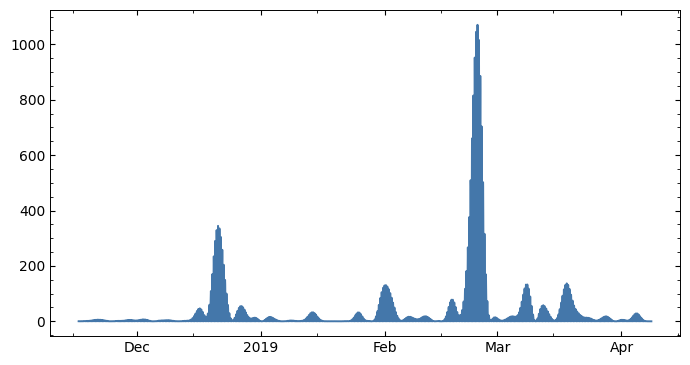

In [8]:
plot_arbitrary_variable(D1_inertial_bandpass**2, type='plot', period=[None, None])

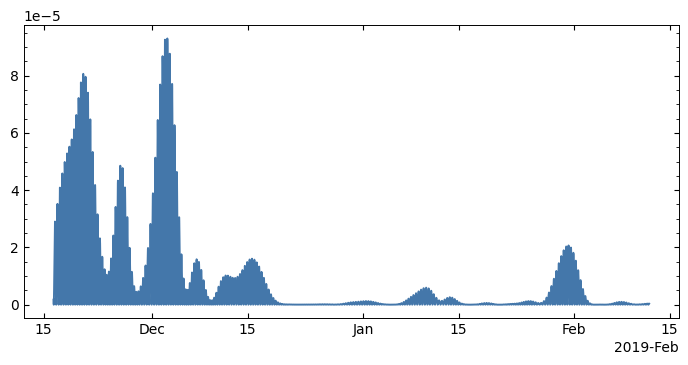

In [16]:
plot_arbitrary_variable(G005_intertial_bandpass**2, type='plot', period=[None, datetime(2019, 2, 12)])

In [12]:
temp_8_inertial_bandpass = bandpass_filter(chain_data.temp[:, 8].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)
temp_7_inertial_bandpass = bandpass_filter(chain_data.temp[:, 7].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

temp_15_inertial_bandpass = bandpass_filter(chain_data.temp[:, 15].data, chain_data.date, 
                                           1/300, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

temp_9_inertial_bandpass = bandpass_filter(chain_data.temp[:, 9].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)


temp_14_inertial_bandpass = bandpass_filter(chain_data.temp[:, 14].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

G005_intertial_bandpass = bandpass_filter(G005.x, chain_data.date, 1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)


In [18]:
temp_9_inertial_bandpass = bandpass_filter(chain_data.temp[:, 9].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

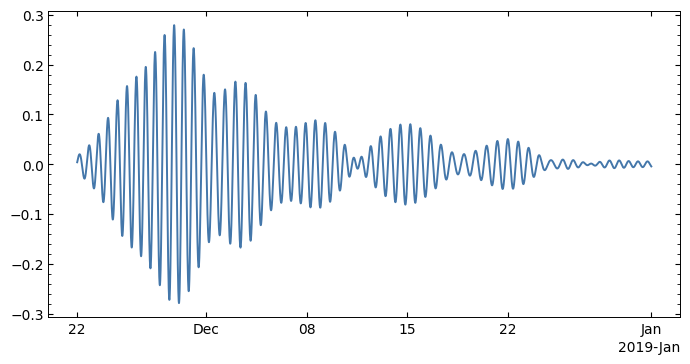

In [23]:
plot_arbitrary_variable(temp_8_inertial_bandpass, type='plot', period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

In [26]:
chain_data.depth[12]

<xarray.DataArray 'depth' ()>
array(126, dtype=int32)
Coordinates:
    depth    int32 126

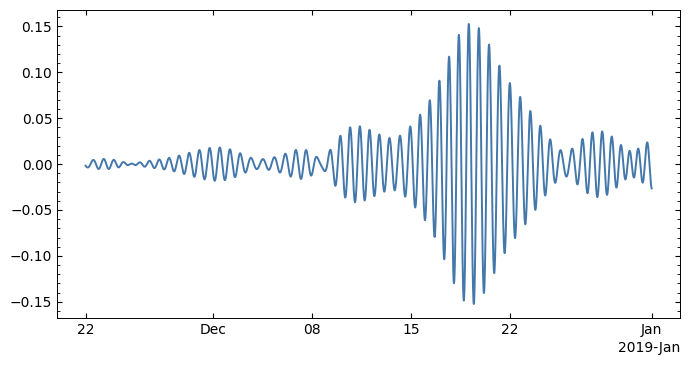

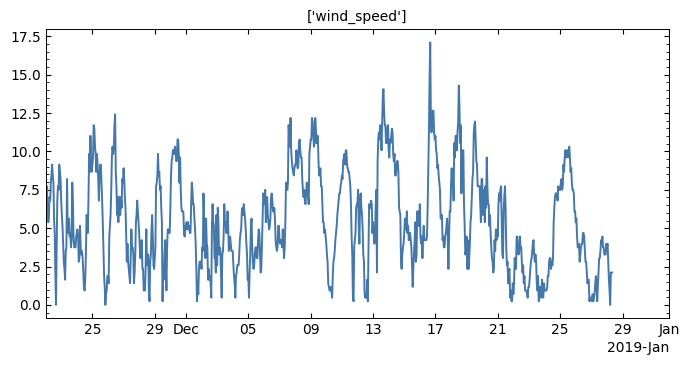

In [36]:
plot_arbitrary_variable(temp_12_inertial_bandpass, type='plot', period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])
plot_AGL_data(ds_buoy,  ['wind_speed'],  period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

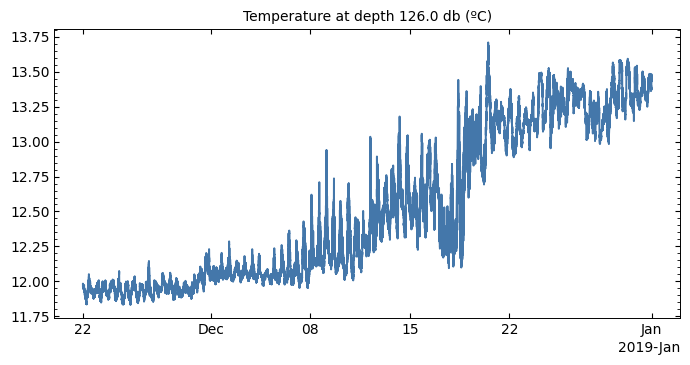

In [29]:
plot_thermistor_temperature(chain_data,12, period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])

In [32]:
temp_12_inertial_bandpass = bandpass_filter(chain_data.temp[:, 12].data, chain_data.date, 
                                           1/5, coriolis_freq_cps*0.9, coriolis_freq_cps*1.15)

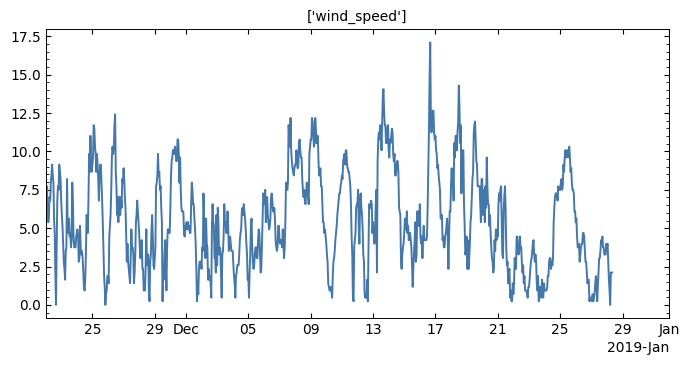

In [35]:
plot_AGL_data(ds_buoy,  ['wind_speed'],  period=[datetime(2018, 11, 22), datetime(2019, 1, 1)])